# Лабараторная работа №4 LinearRegression

In [6]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

lib = {'scikit-learn' : sklearn, 'pandas' : pd, 'numpy' : np, 'matplotlib' : matplotlib, 'seaborn' : sns}

[print(f'{i} version :{lib[i].__version__}') for i in lib]
None

scikit-learn version :0.23.2
pandas version :1.1.2
numpy version :1.19.2
matplotlib version :3.3.2
seaborn version :0.11.0


In [7]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [31]:
df.area.describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

In [30]:
selectedColumns = df.loc[:, :'rain']
y = pd.DataFrame(df.area)
X = pd.get_dummies( selectedColumns, columns = [ 'month', 'day' ] )

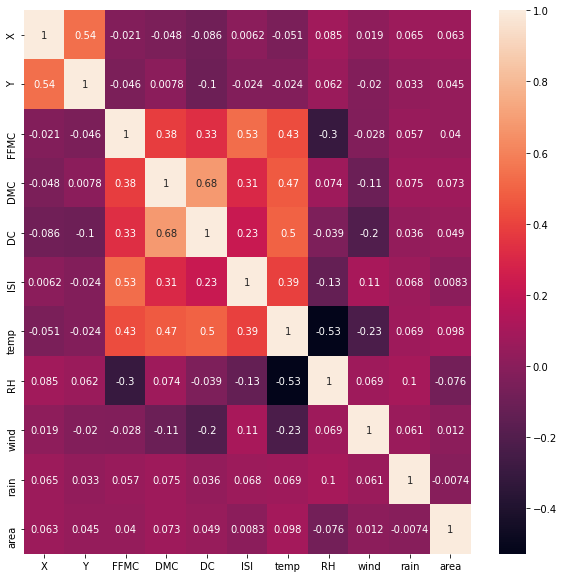

In [6]:
cols = ['X','Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
fig, ax = plt.subplots(figsize=(10,10)) 
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

## Решение задачи с помощью LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на обучающую и тестовую(0.8;0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#создаем стандартный scaler и трансформируем данные
scaler = StandardScaler()
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Создание диапозона вариантов значений для гиперпараметров
grid_params = {
    'fit_intercept' : [True, False] , 
    'normalize' : [True, False],
    'n_jobs' : [-1]
    
}

# Решетчатый поиск
gs_LR = GridSearchCV(LinearRegression(), grid_params, scoring='neg_mean_squared_error', cv=5)
gs_LR.fit(scaled_X_train, y_train)

# Вывод результатов
print(f'Best score MSE : {-(gs_LR.best_score_)}')
print(f'Best parametrs : {gs_LR.best_params_}')

Best score MSE : 4223.206174687066
Best parametrs : {'fit_intercept': True, 'n_jobs': -1, 'normalize': True}


## Решение задачи с помощью Lasso

In [24]:
from sklearn.linear_model import Lasso

# Создание диапозона вариантов значений для гиперпараметров
grid_params = {
    'alpha' : np.logspace(-4, -0.5, 30),
    'fit_intercept' : [True, False] 
    
}

# Решетчатый поиск
gs_Lasso = GridSearchCV(Lasso(max_iter=10000,tol=1), grid_params, scoring='neg_mean_squared_error', cv=5)
gs_Lasso.fit(scaled_X_train, y_train)

# Вывод результатов
print(f'Best score MSE : {-(gs_Lasso.best_score_)}')
print(f'Best parametrs : {gs_Lasso.best_params_}')

Best score MSE : 2196.9272510112983
Best parametrs : {'alpha': 0.31622776601683794, 'fit_intercept': True}


## Решение задачи с помощью Ridge

In [25]:
from sklearn.linear_model import Ridge

# Создание диапозона вариантов значений для гиперпараметров
grid_params = {
    'alpha' : np.logspace(-4, -0.5, 30),
    'fit_intercept' : [True, False] 
    
}

# Решетчатый поиск
gs_Ridge = GridSearchCV(Ridge(max_iter=10000,tol=1), grid_params, scoring='neg_mean_squared_error', cv=5)
gs_Ridge.fit(scaled_X_train, y_train)

# Вывод результатов
print(f'Best score MSE : {-(gs_Ridge.best_score_)}')
print(f'Best parametrs : {gs_Ridge.best_params_}')

Best score MSE : 2246.0888358104758
Best parametrs : {'alpha': 0.31622776601683794, 'fit_intercept': True}


## Построение результатов

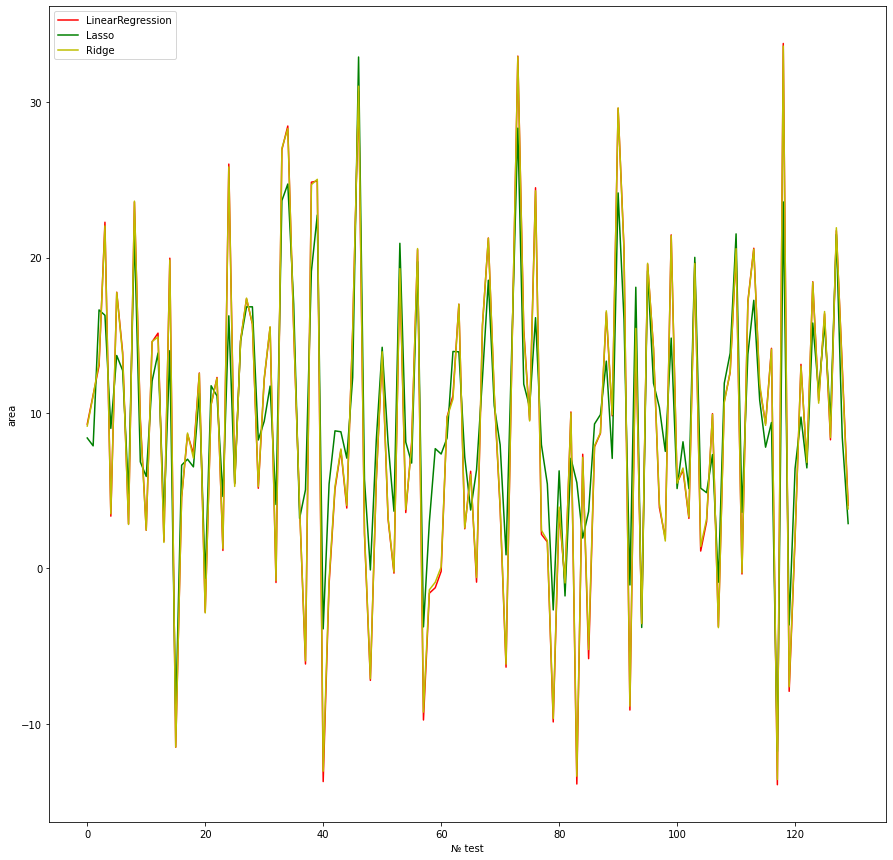

In [101]:
#построение предсказаний
y_LR_pred = gs_LR.predict(scaled_X_test )
y_Lasso_pred = gs_Lasso.predict(scaled_X_test )
y_Ridge_pred = gs_Ridge.predict(scaled_X_test )

#постройка графиков
fig = plt.figure(figsize=(15,15))
ax = plt.axes()

ax.plot( y_LR_pred, color='r', label='LinearRegression')
ax.plot(y_Lasso_pred, color='g', label='Lasso')
ax.plot(y_Ridge_pred, color='y', label='Ridge')

plt.xlabel('№ test')
plt.ylabel('area')
plt.legend();

## Сравнение результатов

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'LR:\nMAE: {mean_absolute_error(y_test, y_LR_pred)};\nMSE:{mean_squared_error(y_test, y_LR_pred)}')
print(f'Lasso:\nMAE {mean_absolute_error(y_test, y_Lasso_pred)};\nMSE:{mean_squared_error(y_test, y_Lasso_pred)}')
print(f'Ridge:\nMAE {mean_absolute_error(y_test, y_Ridge_pred)};\nMSE:{mean_squared_error(y_test, y_Ridge_pred)}')


LR:
MAE: 24.166137731804994;
MSE:9668.13823287887
Lasso:
MAE 23.57454604596405;
MSE:9749.466304340822
Ridge:
MAE 24.121621833069575;
MSE:9669.915757544513


## Наилучший результат на тестовой выборке показали LinearRegression и Ridge

## Графическое сравнение лучшего алгоритма с тестом

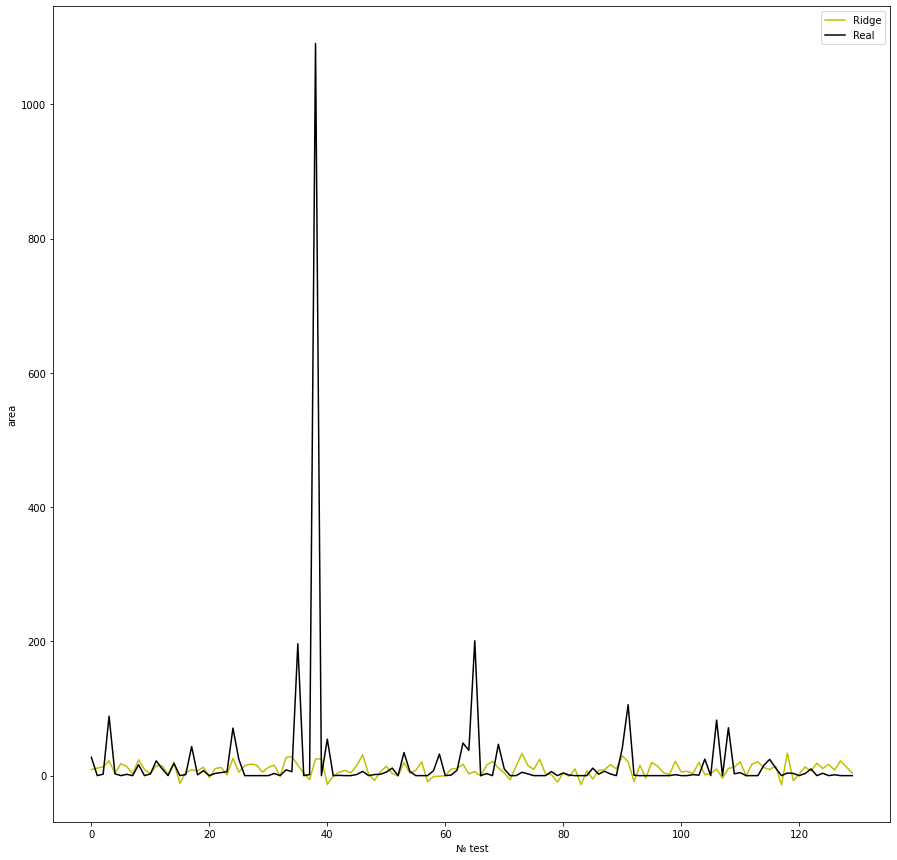

In [100]:
#постройка графиков
fig = plt.figure(figsize=(15,15))
ax = plt.axes()


ax.plot(y_Ridge_pred, color='y', label='Ridge')

test = y_test.copy().reset_index()
del test['index']

ax.plot(test, color='black', label='Real')
plt.xlabel('№ test')
plt.ylabel('area')
plt.legend();